# GRIP : The Sparks Foundation

# Data Science and Business Analytics intern

# TASK2: Prediction using Unsupervised Machine Learning

        From the given ‘Iris’ dataset, predict the optimum number of clusters
        and represent it visually.

# Name:Mayuri  Sonawane

# Importing all libraries required in this notebook

In [52]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.datasets import load_iris

# importing data 

In [53]:
df1 = load_iris()
df= pd.DataFrame(data = np.c_[df1['data'],df1['target']],columns= df1['feature_names']+['species'])
print('Data imported Succesfully')
df.head()

Data imported Succesfully


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [67]:
df.shape 

(150, 6)

In [65]:
df['species'].value_counts()

0.0    50
1.0    50
2.0    50
Name: species, dtype: int64

In [71]:
df.isna().sum() # NO null values in data

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
pred_species         0
dtype: int64

# Finding the optimum number of clusters for K using elbow method

In [73]:
from sklearn.cluster  import KMeans
from scipy.spatial.distance import cdist , pdist
x= df.iloc[:,:3].values
K = range(1,10)
Km= [KMeans(n_clusters = k).fit(x) for k in K]
cent = [k.cluster_centers_ for  k in Km]
D_k = [cdist(x,cent , 'euclidean') for cent in cent]
cIdx = [np.argmin(D, axis= 1) for D in D_k]
dist = [np.min(D, axis=1)for D in D_k]
awgwithinss = [sum(d)/x.shape[0] for d in dist]


C:\Users\mayur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [56]:
# Total within  sum of suqare (wcss)
sos = [sum(d**2)for d in dist] # sum of squares
tss = sum (pdist(x)**2/x.shape[0]) # total sum of squares
bss = sos-tss 
varexplained = bss/tss*100

Text(0.5, 1.0, ' ELBOW FOR K-MEANS CLUSTERING')

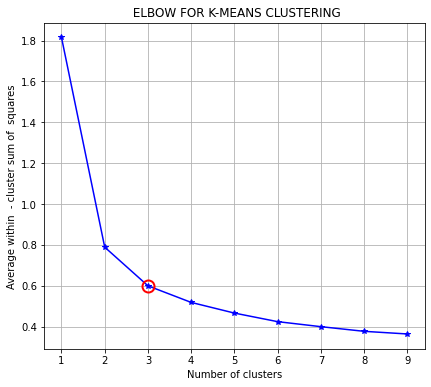

In [57]:
kIdx= 10-1
### plotiing###
kIdx = 2
#elbow curve
#Set the size of the plot
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(K, awgwithinss,'b*-')
plt.plot (K[kIdx], awgwithinss[kIdx], marker = 'o', markersize= 12, 
markeredgewidth = 2 ,markeredgecolor ='r', markerfacecolor='None' )
plt.grid(True)
plt.xlabel("Number of clusters")
plt.ylabel("Average within  - cluster sum of  squares")
plt.title(' ELBOW FOR K-MEANS CLUSTERING')

#   From above graph we can see  that the  point k=3 has low SSC. SO the value representing the Elbow in the graph is number of clusters

# 

#    K Means Cluster Data Visualization

In [64]:
model =  KMeans(n_clusters=3, random_state=11)
model.fit(x)
print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


    we can see clustering algorithm has assigned a
     cluster label for each record. Lets  compare it with the 
      actual species to understand the accuracy of grouping similar records.

In [60]:
from sklearn import metrics
df['pred_species']= np.choose(model.labels_,[1,0,2]).astype(np.int64)
print("Accuracy is :", metrics.accuracy_score(df.species,df.pred_species))

Accuracy is : 0.88


     Applying K means to dataset i.e creating classifier

In [63]:
kmeans = KMeans(n_clusters  = 3 , init = "k-means++",
              max_iter = 300 , n_init = 10 , random_state = 0)
y_kmeans = kmeans.fit_predict(x)

      visulization of clusters  on the 1st two columns

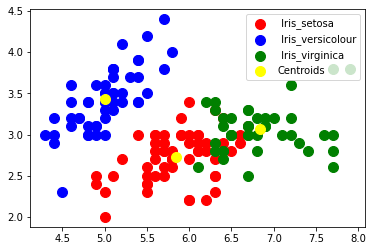

In [72]:
plt.scatter(x[y_kmeans == 0 ,0], x[y_kmeans==0,1], 
           s= 100 , c= 'red' , label = ' Iris_setosa')
plt.scatter(x[y_kmeans == 1 ,0], x[y_kmeans==1,1], 
           s= 100 , c= 'blue' , label = ' Iris_versicolour')
plt.scatter(x[y_kmeans == 2 ,0], x[y_kmeans==2,1], 
           s= 100 , c= 'green' , label = ' Iris_virginica')


# Plotting the centroids the clusters 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
           s= 100 , c= 'yellow' , label = 'Centroids')
 
plt.legend()